# EOEPCA+ Use Case: NO2 Tropospheric Content Cloud Filtering - Register Input Data

In [35]:
from pystac_client import Client
from odc.stac import stac_load
from pystac import Collection, Extent, SpatialExtent, TemporalExtent
from datetime import datetime

## Cloud Fraction

S5P Cloud Fraction Inpuls L3: EOC Geoservice Sentinel-5P TROPOMI L3 Daily Composites - Cloud Fraction (CF)

https://geoservice.dlr.de/eoc/ogc/stac/v1/collections/S5P_TROPOMI_L3_P1D_CF

### Request

In [3]:
url = "https://geoservice.dlr.de/eoc/ogc/stac/v1/"
catalog = Client.open(url)

In [4]:
collection_id = "S5P_TROPOMI_L3_P1D_CF"
bbox = [-10.0, 35.0, 30.0, 70.0]  # Europe
datetime = "2023-08-01T00:00:00Z/2023-12-31T23:59:59Z"

In [5]:
search = catalog.search(
    collections=[collection_id],
    bbox=bbox,
    datetime=datetime,
    limit=400  # adjust as needed
)

In [6]:
items = list(search.items())

### Check Data
Load the data and check that it's valid.

In [7]:
ds = stac_load(
    items,
    #bands=["CF"], 
    crs="EPSG:4326",
    resolution=0.1,
    bbox=bbox,
    chunks={"time": 1} 
)


In [8]:
monthly_mean_cf = ds['cf'].groupby('time.month').median(dim='time')

/dss/dsshome1/06/di38laz/micromamba/envs/s2_dateline/lib/python3.13/site-packages/matplotlib/colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


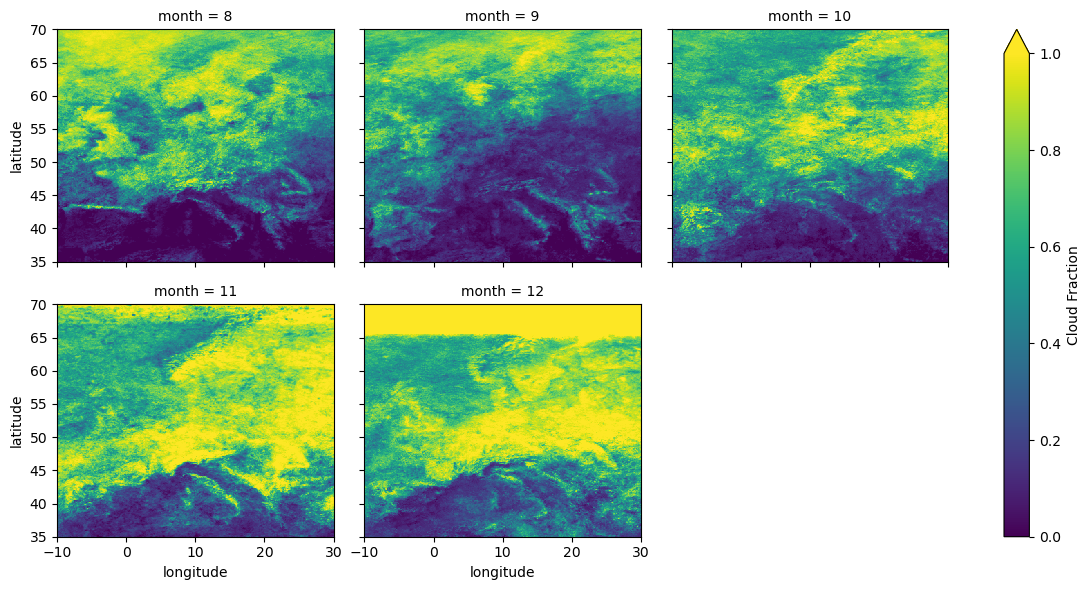

In [9]:
monthly_mean_cf.plot(col="month",
    col_wrap=3,
    cmap="viridis",
    vmin=0,
    vmax=1,
    figsize=(12, 6),
    cbar_kwargs={"label": "Cloud Fraction"})

### Register to EOEPCA via Registration BB

**For registration in EOEPCA create a catalogue and collection from these items.**

In [7]:
print(len(items))
print(items[0])
print(items[-1])

153
<Item id=S5P_DLR_NRTI_01_040201_L3_CF_20231231>
<Item id=S5P_DLR_NRTI_01_040100_L3_CF_20230801>


**To Do: Adapt itmes to best practices** Best Practice document WIP available [here](https://docs.google.com/document/d/1WpIiYeeHoQWaAL-zJ35DQxsodrKPbYxpqKS0xyTm150/edit?tab=t.0#heading=h.orr81n4mdk81).

In [15]:
items[0].stac_extensions

['https://stac-extensions.github.io/eo/v1.1.0/schema.json',
 'https://stac-extensions.github.io/view/v1.0.0/schema.json',
 'https://stac-extensions.github.io/projection/v2.0.0/schema.json',
 'https://stac-extensions.github.io/processing/v1.0.0/schema.json',
 'https://stac-extensions.github.io/scientific/v1.0.0/schema.json']

**Items into Collection** and **To Do: Adapt Collection to best practices**

In [55]:
#item_dates = [item.datetime for item in items]
item_dates = [item.datetime for item in items if isinstance(item.datetime, datetime)]
start = min(item_dates)
end = max(item_dates)
temp_extent = TemporalExtent([[start, end]])
req_bbox = SpatialExtent([bbox])
ori_bbox = SpatialExtent([items[0].bbox])
extent = Extent(spatial=ori_bbox, temporal=temp_extent)
extensions = items[0].stac_extensions

collection = Collection(
    id="s5p-cloud-fraction-2023-aug-dec",
    description="Subset of Sentinel-5P Cloud Fraction L3 data for August-December 2023, from DLR Geoservice STAC API.",
    extent=extent,
    license="proprietary",
    keywords=["Sentinel-5P", "TROPOMI", "Cloud Fraction", "Europe", "DLR"],
    providers=[],
    summaries={},
    #stac_extensions=[extensions]
)


**Collections into Catalogue**

In [56]:
catalog = Catalog(
    id="s5p-cloud-fraction-europe",
    description="Catalog of Sentinel-5P L3 Cloud Fraction data August-December 2023)"
)

# Link the collection to the catalog
catalog.add_child(collection)

# Add all items to the collection
for item in items:
    collection.add_item(item)

In [57]:
catalog

<Catalog id=s5p-cloud-fraction-europe>

**To Do: Save json to Workspace BB (EOX, Stefan A.) or devcluster object storage**

In [58]:
output_dir = "s5p-stac-catalog"

catalog.normalize_and_save(
    root_href=output_dir,
    catalog_type="SELF_CONTAINED"
)

**Have Registration BB - Harvester add the catalogue to EOEPCA STAC API**

In [ ]:
#  https://github.com/EOEPCA/demo/blob/main/demoroot/notebooks/06%20Resource%20Registration%20Harvester.ipynb

**To Do: Replicate workflow with [eodm](https://github.com/geopython/eodm)**

In [2]:
# https://github.com/geopython/eodm

## Tropospheric NO2 - Terrascope STAC API

S5P NO2 Troposphere L2: Sentinel-5P Nitrogen Dioxide tropospheric column

CDSE: not well filled
- Offline: https://browser.stac.dataspace.copernicus.eu/collections/sentinel-5p-l2-no2-offl
- Near Real Time: https://browser.stac.dataspace.copernicus.eu/collections/sentinel-5p-l2-no2-nrti?.language=de

Terrascope:
- https://services.terrascope.be/stac/collections/urn:eop:VITO:TERRASCOPE_S5P_L3_NO2_TD_V1/items
- https://docs.terrascope.be/Developers/WebServices/TerraCatalogue/STACAPI.html
- https://docs.terrascope.be/Developers/WebServices/TerraCatalogue/ProductDownload.html#authentication

In [10]:
#url = "https://stac.dataspace.copernicus.eu/v1"
url = "https://services.terrascope.be/stac/"
catalog = Client.open(url)

In [11]:
#collection_id = "sentinel-5p-l2-no2-offl"
collection_id = "urn:eop:VITO:TERRASCOPE_S5P_L3_NO2_TD_V2"


In [12]:
search = catalog.search(
    collections=[collection_id],
    bbox=bbox,
    datetime=datetime,
    limit=400 # adjust as needed
)

In [13]:
items2 = list(search.items())

In [14]:
print(len(items2))
print(items2[0])
print(items2[-1])

154
<Item id=urn:eop:VITO:TERRASCOPE_S5P_L3_NO2_TD_V2:S5P_L3_NO2_TD_20230731_V200>
<Item id=urn:eop:VITO:TERRASCOPE_S5P_L3_NO2_TD_V2:S5P_L3_NO2_TD_20231231_V200>


In [15]:
ds2 = stac_load(
    items2,
    #bands=["NO2"], 
    crs="EPSG:4326",
    resolution=0.1,
    bbox=bbox,
    chunks={"time": 1}  # Enable Dask chunking
)

In [16]:
ds2

<xarray.Dataset> Size: 172MB
Dimensions:      (latitude: 350, longitude: 400, time: 154)
Coordinates:
  * latitude     (latitude) float64 3kB 69.95 69.85 69.75 ... 35.25 35.15 35.05
  * longitude    (longitude) float64 3kB -9.95 -9.85 -9.75 ... 29.75 29.85 29.95
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 1kB 2023-07-31T01:00:04 ... 2023-12-31...
Data variables:
    WEIGHT       (time, latitude, longitude) float32 86MB dask.array<chunksize=(1, 350, 400), meta=np.ndarray>
    NO2          (time, latitude, longitude) float32 86MB dask.array<chunksize=(1, 350, 400), meta=np.ndarray>

In [17]:
monthly_mean_no2 = ds2['NO2'].groupby('time.month').median(dim='time')

In [18]:
monthly_mean_no2

<xarray.DataArray 'NO2' (month: 6, latitude: 350, longitude: 400)> Size: 3MB
dask.array<stack, shape=(6, 350, 400), dtype=float32, chunksize=(1, 350, 400), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 3kB 69.95 69.85 69.75 ... 35.25 35.15 35.05
  * longitude    (longitude) float64 3kB -9.95 -9.85 -9.75 ... 29.75 29.85 29.95
    spatial_ref  int32 4B 4326
  * month        (month) int64 48B 7 8 9 10 11 12

In [22]:
import requests
import xarray as xr
import rioxarray
from rasterio.io import MemoryFile

def get_terrascope_token(username: str, password: str) -> str:
    url = "https://sso.terrascope.be/auth/realms/terrascope/protocol/openid-connect/token"
    data = {
        "grant_type": "password",
        "client_id": "public",
        "username": username,
        "password": password
    }
    response = requests.post(url, data=data)
    response.raise_for_status()
    return response.json()["access_token"]

def load_no2_from_items(items, token, asset_key="NO2"):
    """Takes a list of STAC items and loads the NO2 band from each into a time-stacked xarray DataArray."""
    datasets = []
    for item in items:
        try:
            url = item.assets[asset_key].href
            headers = {"Authorization": f"Bearer {token}"}
            r = requests.get(url, headers=headers)
            r.raise_for_status()

            with MemoryFile(r.content) as memfile:
                with memfile.open() as dataset:
                    da = rioxarray.open_rasterio(dataset).squeeze("band", drop=True)
                    da = da.rio.write_crs("EPSG:4326")
                    da = da.expand_dims(time=[item.datetime])
                    datasets.append(da)
        except Exception as e:
            print(f"Failed to load {item.id}: {e}")

    if datasets:
        return xr.concat(datasets, dim="time").sortby("time")
    else:
        print("⚠️ No valid datasets loaded.")
        return None

In [20]:
import getpass

username = "peter.zellner"
password = getpass.getpass("Terrascope password: ")

token = get_terrascope_token(username, password)

Terrascope password:  ········


In [ ]:
# Assume 'items2' was created with a search, e.g.:
# items = list(search.get_items())

no2_data = load_no2_from_items(items2, token)

if no2_data is not None:
    print(no2_data)
    no2_data.mean(dim="time").plot(cmap="viridis", robust=True)

## Tropospheric NO2 - Terrascope openEO

- https://docs.terrascope.be/Developers/WebServices/OpenEO/OpenEO.html
- https://openeo.vito.be/openeo/collections

In [1]:
import openeo
connection = openeo.connect("openeo.vito.be").authenticate_oidc()

ModuleNotFoundError: No module named 'openeo'

In [ ]:
# Option A: Save files to eopca workspace, adapt asset path
# Option B: Register files with original href -> Authentication at access??